### LogisticRegression

En este Notebook pretendemos entrenador el modelo *LogisticRegression* con el nuevo análisis de datos realizado en *07_feature_importances.ipynb*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("08_feature_importances.csv")
pd.options.display.max_columns = None

In [3]:
df

,Action Taken,Severity Level,Attack Type,Destination Port,Source Port,Anomaly Scores,Packet Length,Localidad
0,2,1,2,7709,14137,2827,439,134
1,0,1,2,21888,7587,5070,1110,60
2,1,1,0,24463,7388,8595,242,61
3,0,2,2,14681,8913,1556,321,135
4,0,1,0,11942,2365,50,1398,20
...,...,...,...,...,...,...,...,...
39995,2,2,0,2665,14033,3870,1364,210
39996,2,0,0,12634,731,2687,1120,307
39997,0,1,0,11250,10087,3058,979,178
39998,1,1,2,774,8909,9613,419,252


In [4]:
# validamos que nuestro objetivo a predecir se corresponde a datos balanceados.
print(df['Action Taken'].value_counts())
print('')
print(df['Severity Level'].value_counts())
print('')
print(df['Attack Type'].value_counts())

Action Taken
0    13529
1    13276
2    13195
Name: count, dtype: int64

Severity Level
2    13435
0    13382
1    13183
Name: count, dtype: int64

Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64


In [5]:
# utilizamos el módulo 'train_test_split' para dividir nuestra muestra en dos conjuntos de datos 'train y test' 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=True, stratify=df['Action Taken'], random_state=42)

print("(filas,columas) train:",train.shape)
print("(filas,columas) test:",test.shape)


(filas,columas) train: (32000, 8)
(filas,columas) test: (8000, 8)


### Action Taken

Entrenaremos los modelos utilizando la columna 'Action Taken' como objetivo a predecir.

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [7]:
# escalamos los datos con el módulo 'StandardScaler' para lograr eficiencia y evitar error en los modelos de entrenamiento.
X_train = train.drop('Action Taken', axis=1)
y_train = train['Action Taken']

X_test = test.drop('Action Taken', axis=1)
y_test = test['Action Taken']

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

# calculamos el mejor íncide posible para el parámetro 'C'.
vectorC = np.logspace(-4,4,5)
param_grid = {'C': vectorC }
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(Xs_train, y_train)
print("El mejor índice para 'C' es:", grid.best_params_['C'])

El mejor índice para 'C' es: 0.0001


In [9]:
# entrenamos el modelo.
lr = LogisticRegression(C=0.0001, max_iter=1000, random_state=42).fit(Xs_train, y_train)

# predecimos 'y' con el conjunto de datos 'train'.
lr_y_pred = lr.predict(Xs_train)
report_lr = classification_report(y_train, lr_y_pred)
lr_acc = accuracy_score(y_train, lr_y_pred)
lr_confmat = confusion_matrix(y_train, lr_y_pred)

# evaluamos el modelo con el conjunto de datos 'test'
lr_y_pred_test = lr.predict(Xs_test)
report_rf_test = classification_report(y_test, lr_y_pred_test)
lr_acc_test = accuracy_score(y_test, lr_y_pred_test)
lr_confmat_test = confusion_matrix(y_test, lr_y_pred_test)

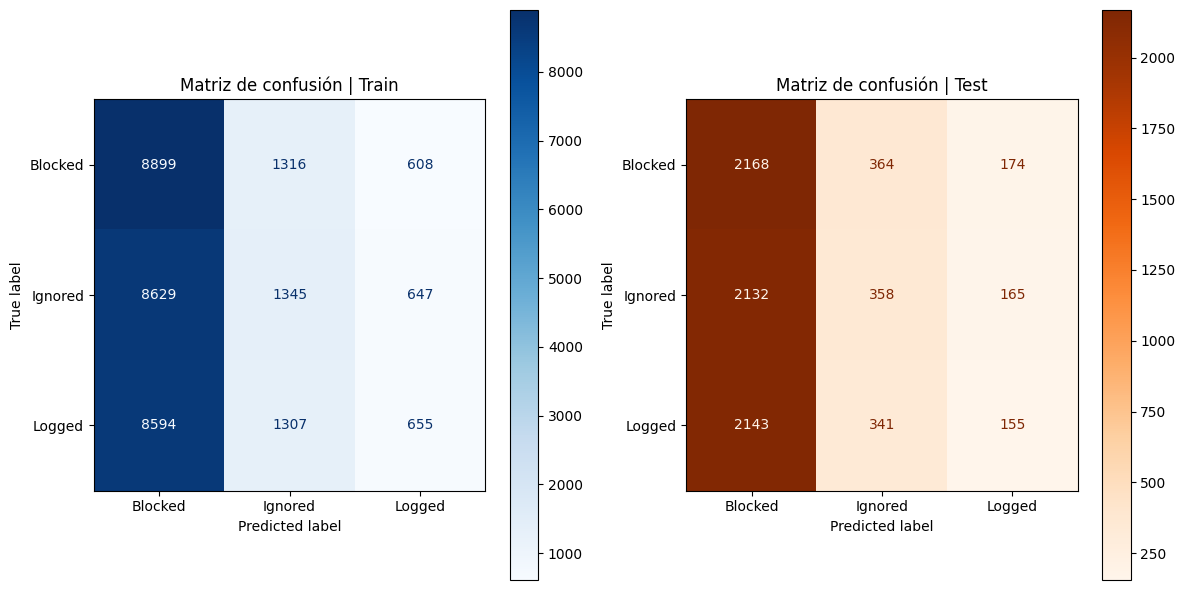

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       0.34      0.82      0.48     10823
           1       0.34      0.13      0.18     10621
           2       0.34      0.06      0.11     10556

    accuracy                           0.34     32000
   macro avg       0.34      0.34      0.26     32000
weighted avg       0.34      0.34      0.26     32000


test               precision    recall  f1-score   support

           0       0.34      0.80      0.47      2706
           1       0.34      0.13      0.19      2655
           2       0.31      0.06      0.10      2639

    accuracy                           0.34      8000
   macro avg       0.33      0.33      0.26      8000
weighted avg       0.33      0.34      0.26      8000

accuracy_score_train: 34.06%
accuracy_score_test: 33.51%


In [10]:
# graficamos confusion_matrix del modelo entrenado train y test para realizar una comparación visual.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['Blocked', 'Ignored', 'Logged']
ConfusionMatrixDisplay(lr_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(lr_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

# pintamos los resultados de 'classification_report' y 'accuracy_score'
print("Reporte de Clasificación")
print("")
print("train", report_lr)
print("")
print("test", report_rf_test)
print(f"accuracy_score_train: {lr_acc*100:.2f}%")
print(f"accuracy_score_test: {lr_acc_test*100:.2f}%")

Realizando nuevamente el análisis del dataset y modificando el número de columnas, logramos mejorar con respecto a los resultados obtenidos en *04_action_taken.ipynb*, el Recall. Sin embargo, no pudimos mejorar los resultados de precisión cuando lanzamos el conjunto de datos *test*.

### Severity Level

Entrenaremos los modelos utilizando la columna 'Severity Level' como objetivo a predecir.

In [11]:
X_train = train.drop('Severity Level', axis=1)
y_train = train['Severity Level']

X_test = test.drop('Severity Level', axis=1)
y_test = test['Severity Level']

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [12]:
vectorC = np.logspace(-4,4,5)
param_grid = {'C': vectorC }
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(Xs_train, y_train)
print("El mejor índice para 'C' es:", grid.best_params_['C'])

El mejor índice para 'C' es: 1.0


In [13]:
lr = LogisticRegression(C=0.0001, max_iter=1000, random_state=42).fit(Xs_train, y_train)

lr_y_pred = lr.predict(Xs_train)
report_lr = classification_report(y_train, lr_y_pred)
lr_acc = accuracy_score(y_train, lr_y_pred)
lr_confmat = confusion_matrix(y_train, lr_y_pred)

lr_y_pred_test = lr.predict(Xs_test)
report_rf_test = classification_report(y_test, lr_y_pred_test)
lr_acc_test = accuracy_score(y_test, lr_y_pred_test)
lr_confmat_test = confusion_matrix(y_test, lr_y_pred_test)

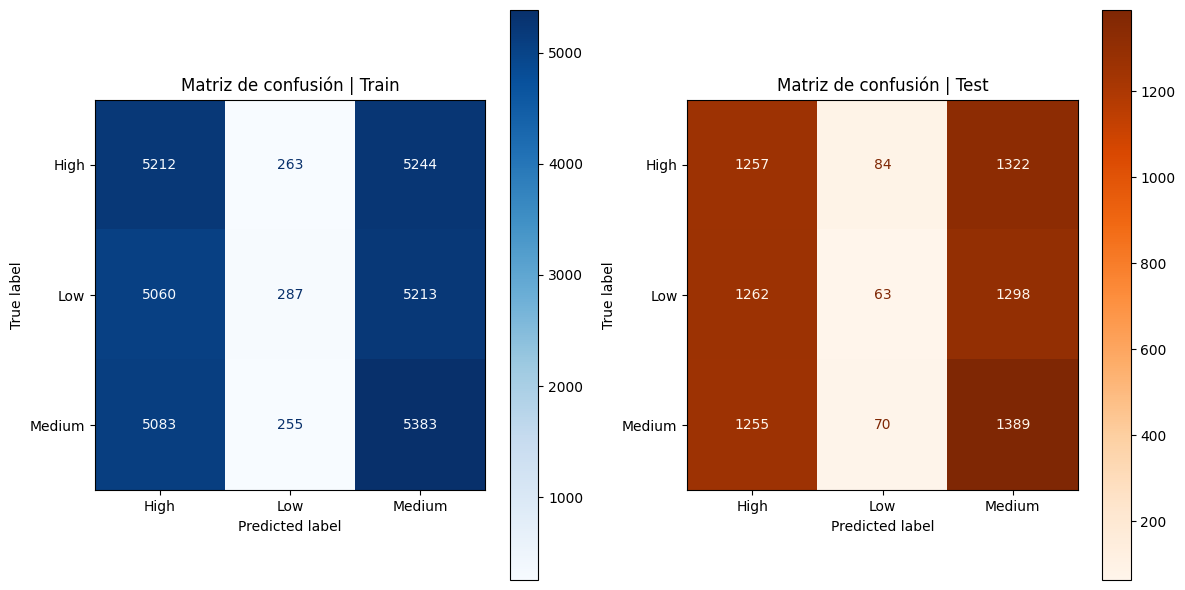

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       0.34      0.49      0.40     10719
           1       0.36      0.03      0.05     10560
           2       0.34      0.50      0.41     10721

    accuracy                           0.34     32000
   macro avg       0.35      0.34      0.29     32000
weighted avg       0.35      0.34      0.29     32000


test               precision    recall  f1-score   support

           0       0.33      0.47      0.39      2663
           1       0.29      0.02      0.04      2623
           2       0.35      0.51      0.41      2714

    accuracy                           0.34      8000
   macro avg       0.32      0.34      0.28      8000
weighted avg       0.32      0.34      0.28      8000

accuracy_score_train: 34.01%
accuracy_score_test: 33.86%


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['High','Low','Medium']
ConfusionMatrixDisplay(lr_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(lr_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

print("Reporte de Clasificación")
print("")
print("train", report_lr)
print("")
print("test", report_rf_test)
print(f"accuracy_score_train: {lr_acc*100:.2f}%")
print(f"accuracy_score_test: {lr_acc_test*100:.2f}%")

Hemos logramos mejorar Recall con respecto al entrenamiento en *05_severity_level.ipynb*. Sin embargo, no pudimos mejorar los resultados de precisión cuando lanzamos el conjunto de datos *test*.

### Attack Type

Entrenaremos los modelos utilizando la columna 'Attack Type' como objetivo a predecir.

In [15]:
X_train = train.drop('Attack Type', axis=1)
y_train = train['Attack Type']

X_test = test.drop('Attack Type', axis=1)
y_test = test['Attack Type']

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [16]:
vectorC = np.logspace(-4,4,5)
param_grid = {'C': vectorC }
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(Xs_train, y_train)
print("El mejor índice para 'C' es:", grid.best_params_['C'])

El mejor índice para 'C' es: 0.0001


In [17]:
lr = LogisticRegression(C=0.0001, max_iter=1000, random_state=42).fit(Xs_train, y_train)

lr_y_pred = lr.predict(Xs_train)
report_lr = classification_report(y_train, lr_y_pred)
lr_acc = accuracy_score(y_train, lr_y_pred)
lr_confmat = confusion_matrix(y_train, lr_y_pred)

lr_y_pred_test = lr.predict(Xs_test)
report_rf_test = classification_report(y_test, lr_y_pred_test)
lr_acc_test = accuracy_score(y_test, lr_y_pred_test)
lr_confmat_test = confusion_matrix(y_test, lr_y_pred_test)

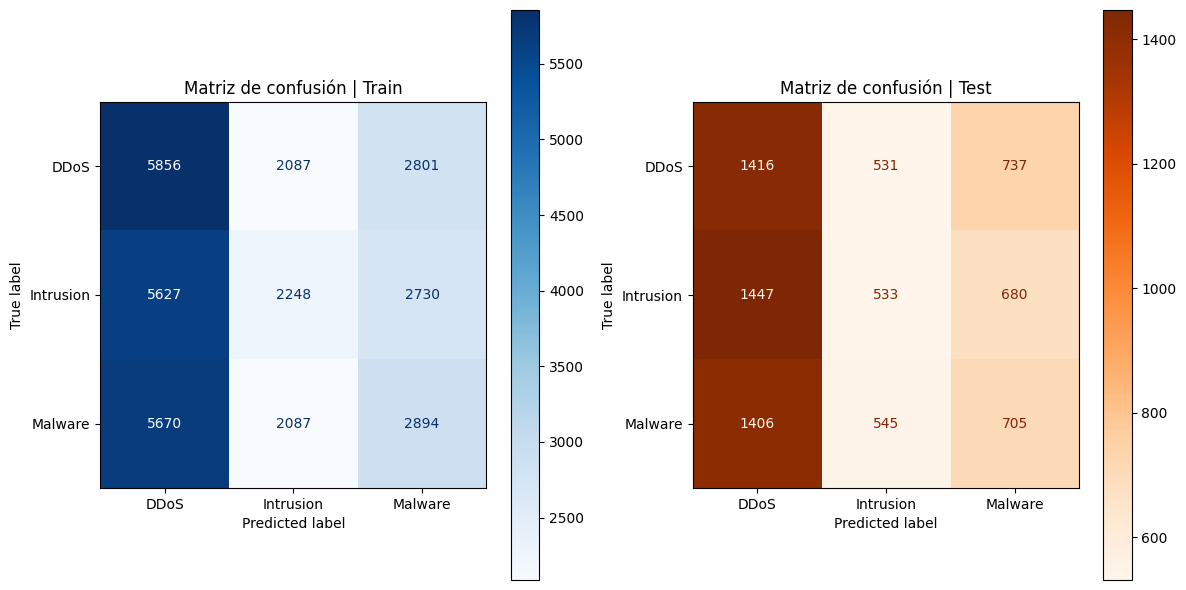

Reporte de Clasificación

train               precision    recall  f1-score   support

           0       0.34      0.55      0.42     10744
           1       0.35      0.21      0.26     10605
           2       0.34      0.27      0.30     10651

    accuracy                           0.34     32000
   macro avg       0.34      0.34      0.33     32000
weighted avg       0.34      0.34      0.33     32000


test               precision    recall  f1-score   support

           0       0.33      0.53      0.41      2684
           1       0.33      0.20      0.25      2660
           2       0.33      0.27      0.30      2656

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.32      8000
weighted avg       0.33      0.33      0.32      8000

accuracy_score_train: 34.37%
accuracy_score_test: 33.17%


In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
clases_a_predecir = ['DDoS','Intrusion','Malware']
ConfusionMatrixDisplay(lr_confmat, display_labels=clases_a_predecir).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de confusión | Train")
ConfusionMatrixDisplay(lr_confmat_test, display_labels=clases_a_predecir).plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de confusión | Test")
plt.tight_layout()
plt.show()

print("Reporte de Clasificación")
print("")
print("train", report_lr)
print("")
print("test", report_rf_test)
print(f"accuracy_score_train: {lr_acc*100:.2f}%")
print(f"accuracy_score_test: {lr_acc_test*100:.2f}%")

En esta oportunidad también hemos logrado mejorar el Recall con respecto a los resultados obtenidos en *06_attack_type.ipynb*, pero no mejoramos la precisión del modelo.